# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1303 Хулап Олеся.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим 4 метода вычисления одночленов с помощью минимального количества операций, а также соответствующие оценки количества затрачиваемых операций.<br>

### Используемые операции:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - длина бинарной записи n, уменьшенная на 1<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (количество единиц в бинарной записи числа)

### Бинарный метод $SX$

Данный метод осуществляет возведение числа $n$ в степень с помощью следующего алгоритма:
<ol>
<li>Необходимо представить $n$ в бинарном виде $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, при том $a_{m} = 1$</li>
<li>Далее отбрасываем старший бит</li>
<li>Преобразуем запись $n$ следующим образом:<center>$a_{i} = 1 \Rightarrow a_{i} = SX$<br>$a_{i} = 0 \Rightarrow a_{i} = S$</center></li>
<li>Вычисление выполняется, начиная с $x$ и идёт по преобразованной записи $n:$<center>$a_{i} = S \Rightarrow x = x ^ 2$<br>$a_{i} = X \Rightarrow x = x * x$</center></li>
</ol>
Число операций для бинарного метода $SX$: $\lambda(n) + \nu(n) - 1$
    
### Бинарный метод возведения справа налево 
Для возведения числа в степень $n$ требуется:
<ol>
    <li>На нулевой итерации присвоить N, Y и Z следующие значения: $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - перейти на пункт 3, иначе - на пункт 4</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Z = Z * Z$; переходим на пункт 2</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Y = Z * Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и завершаем работу алгоритма. Иначе - переприсваиваем $Z = Z * Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево: $\lambda(n) + \nu(n)$

### Метод множителей
Далее представлены шаги возведения в степень $n$ методом множителей:
<ol>
    <li>Представим $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель числп $n$, а $q > 1$. Тогда $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>Если же $n = 1$, то искомая степень найдена.</li>
</ol>
С помощью данного алгоритма можно разложить (тем самым вычисляя) $p$ на любом шаге и, в итоге, получить $x^n$

### Дерево степеней
Данный метод осуществляет возведение числа $n$ в степень с помощью следующего алгоритма:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$ - корень дерева</li>
    <li>$k+1$-й уровень строится так: берётся каждый узел $i$ на $k$-м уровне слева направо и присоединяются узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>При этом, если узел уже появлялся - он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод SX
Реализуем функцию $SxFunction$, которая будет принимать на вход целочисленное значение, являющееся степенью, в которую нужно возвести переменную. В функции значение степени записывается в двоичном виде без старшего бита. Далее, по алгоритму, единицы заменяются на $SX$, двойки - на $S$. Переменная $res$ хранит итоговое значение, которое получится в ходе итерации по преобразованной $SX$-строке. Для наглядности выведем $SX$-строку, а также значение $res$ на каждой итерации алгоритма в виде (номер итерации: значение $result$).


In [102]:
def SxFunction(n):
    if n < 1:
        return 1
    bin_n = str(bin(n))[3:]
    sx_repres = bin_n.replace('1','SX')
    sx_repres = sx_repres.replace('0', 'S')
    res = var('x')
    show(sx_repres)
    for i, elem in enumerate(sx_repres):
        if elem == 'X':
            res *= x
        else:
            res = res^2
        print(f"({i + 1}: {res})", end = ' ')
    return res

Пример работы программы для нескольких $n$, равных $13, 45, 87$: 

In [103]:
show(SxFunction(13))

'SXSSX'

(1: x^2) (2: x^3) (3: x^6) (4: x^12) (5: x^13) 

x^13

In [104]:
show(SxFunction(45))

'SSXSXSSX'

(1: x^2) (2: x^4) (3: x^5) (4: x^10) (5: x^11) (6: x^22) (7: x^44) (8: x^45) 

x^45

In [105]:
show(SxFunction(87))

'SSXSSXSXSX'

(1: x^2) (2: x^4) (3: x^5) (4: x^10) (5: x^20) (6: x^21) (7: x^42) (8: x^43) (9: x^86) (10: x^87) 

x^87

Проверка оценки числа операций для данных $n$:<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 5 \Rightarrow$ Верно<br>
$n = 45 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 8 \Rightarrow$ Верно<br>
$n = 87 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 6; \nu(n) = 5; \lambda(n) + \nu(n) - 1 = 10 \Rightarrow$ Верно<br>
Таким образом, можно сделать вывод, что для выбранных $n$ формула для вычисления количества операций корректна.

#### Вывод
Реализован бинарный метод $SX$, проверена его работоспособность и оценка количества операций. Метод прост в реализации, при этом позволяет быстро вычислить одночлен. Также, благодаря оценке можно легко узнать, за сколько итераций будет произведён расчёт.

### 2. Метод возведения справа налево

Реализуем функцию $RightToLeftFunction$, которая на вход принимает целочисленное значение, являющееся степенью, в которую нужно возвести переменную. Внутри функции инициализируется нулевая итерация из теоретического положения (п.1), а также основной алгоритм (п.2 - п.5). Реализована возможность вывода промежуточных значений $N, Y, Z$.

In [106]:
def RightToLeftFunction(n, intermediateInfo = False):
    counter = 0
    N = n
    Y = 1
    Z = var('x')
    while True:
        if N % 2 == 0:
            N = floor(N / 2)
            Z = Z * Z
        else:
            N = floor(N / 2)
            Y = Z * Y
            if (N == 0):
                counter += 1
                break
            else:
                Z = Z * Z
        counter += 1
        if (intermediateInfo): print(f"iteration: {counter}\nN: {N}\nY: {Y}\nZ: {Z}\n")
    if (intermediateInfo): print(f"iteration: {counter}\nN: {N}\nY: {Y}\nZ: {Z}\n")
    return Y

Пример работы программы для нескольких $n$, равных $13, 45, 87$: 

In [107]:
show(RightToLeftFunction(13))

x^13

##### Листинг работы алгоритма для n = 13:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     13     |      1     |     $x$    |
|      1     |      6     |     $x$    |    $x^2$    |
|      2     |      3     |     $x$    |    $x^4$   |
|      3     |      1     |    $x^5$   |    $x^8$   |
|      4     |      0     |  $x^{13}$  |   $x^{8}$  |

In [108]:
show(RightToLeftFunction(45))

x^45

##### Листинг работы алгоритма для n = 45:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     45     |      1     |     $x$    |
|      1     |     22     |     $x$    |    $x^2$   |
|      2     |     11     |     $x$    |    $x^4$   |
|      3     |      5     |    $x^5$   |    $x^8$   |
|      4     |      2     |  $x^{13}$  |  $x^{16}$  |
|      5     |      1     |  $x^{13}$  |  $x^{32}$  |
|      6     |      0     |  $x^{45}$  |  $x^{64}$  |

In [109]:
show(RightToLeftFunction(87))

x^87

##### Листинг работы алгоритма для n = 87:

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     87     |      1     |     $x$    |
|      1     |     43     |     $x$    |    $x^2$   |
|      2     |     21     |    $x^3$   |    $x^4$   |
|      3     |     10     |    $x^7$   |    $x^8$   |
|      4     |      5     |   $x^{7}$  |  $x^{16}$  |
|      5     |      2     |  $x^{23}$  |  $x^{32}$  |
|      6     |      1     |  $x^{23}$  |  $x^{64}$  |
|      7     |      0     |  $x^{87}$  |  $x^{128}$ |

Проверим оценку числа операций для данных $n$:<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n)  = 6 \Rightarrow$ Верно<br>
$n = 45 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 4; \lambda(n) + \nu(n)  = 9 \Rightarrow$ Верно<br>
$n = 87 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 6; \nu(n) = 5; \lambda(n) + \nu(n)  = 11 \Rightarrow$ Верно<br>
Таким образом, можно сделать вывод, что для наших $n$ формула для вычисления количества операций корректна.
#### Вывод
Реализован бинарный метод возведения числа в степень справа налево, проверена его работоспособность и оценка количества операций. Метод не такой простой, как метод $SX$, а также требует на одну операцию больше, что подтверждено на практике. При этом легко можно вычислить число операций для данного метода по формуле $\lambda(n) + \nu(n)$. В общем случае после завершения алгоритма значение $Z$ будет равно $x^{2^{k-2}}$, где $k$ - число итераций метода.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Учитывая оценки, количество операций в методе справа налево на 1 больше, чем в методе $SX$. Число итераций в методе справа налево можно оценить как $\lfloor log_{2}(n) \rfloor + 2$. В методе $SX$ же число итераций равно $\lambda(n) + \nu(n) - 1$, поэтому бинарный метод $SX$ выгоднее возведения справа налево.

### 4. Метод множителей

Реализуем метод множителей вручную для $n= 13, n = 47, n = 87$ по алгоритму, приведённому в теоретическом положении.<br>

#### Метод множителей для n = 13
$x^{13} = x * x^{12}$<br>
$x^{12} = (x^2)^6$<br>
$x^6 = (x^2)^3$<br>
$x^3 = x * x^2$<br>
$x^2 = x * x$<br>
Получаем следующую последовательность: $x, x^2, x^3, x^6, x^{12}, x^{13}$ <br>

Всего 5 операций.

#### Метод множителей для n = 45:
$x^{45} = (x^{15})^{3}$<br>
$x^{44} = (x^{22})^2$<br>
$x^{22} = (x^{11})^2$<br>
$x^{11} = x * x^{10}$<br>
$x^{10} = (x^5)^2$<br>
$x^5 = x * x^4$<br>
$x^4 = (x^2)^2$<br>
$x^2 = x * x$<br>
Получаем следующую последовательность: $x, x^2, x^4, x^5, x^{10}, x^{11}, x^{22}, x^{44}, x^{45}$ <br>

Всего 8 операций.

#### Метод множителей для n = 87
$x^{87} = x * x^{86}$<br>
$x^{86} = (x^{43})^{2}$<br>
$x^{43} = x * x^{42}$<br>
$x^{42} = (x^{21})^2$<br>
$x^{21} = x * x^{20}$<br>
$x^{20} = (x^{10})^2$<br>
$x^{10} = (x^5)^2$<br>
$x^5 = x * x^4$<br>
$x^4 = (x^2)^2$<br>
$x^2 = x * x$<br>
Получаем следующую последовательность: $x, x^2, x^4, x^5, x^{10}, x^{20}, x^{21}, x^{42}, x^{43}, x^{86}, x^{87}$ <br>

Всего 10 операций.

#### Вывод
Рассмотрен метод множителей для нескольких $n$. Его преимущество заключается в простоте идеи, возможности легко посчитать количество операций для возведения числа в степень вручную. Помимо этого, метод множителей может быть быстрее, чем бинарный (например, для $n=15$). Его недостатки состоят в сложности реализации, а также он иногда может проигрывать другим методам (например, бинарному при $n=33$).

### 5. Построение дерева степеней

Была реализована функция $buildTree()$, которая генерирует дерево степеней, по алгоритму описанному в теоретических положениях. На вход функции подаётся количество уровней, которые надо построить

In [110]:
def buildTree(n):
    found = False
    tree = Graph()
    tree.add_vertex(1)
    vertices = [1]
    
    while found == False:
        new_vertices = []
        
        for el in vertices:
            path = tree.shortest_path(1, el)
            for vert in path:
                new_vertice = el + vert
                if new_vertice not in tree.vertices():
                    tree.add_vertex(new_vertice)
                    tree.add_edge(el, new_vertice)
                    new_vertices.append(new_vertice)
                    
                    if new_vertice == n:
                        found = True
                        
        vertices = new_vertices 
        
    return tree

Далее были реализованы функции поиска пути возведения числа в степень $n$ и вывода дерева на экран с выделеным на нём путём

In [111]:
def buildPath(tree, vertice):
    path = []
    vertice_path = tree.shortest_path(1, vertice)
    for i in range(len(vertice_path)-1):
        path.append((vertice_path[i], vertice_path[i+1]))
    return path

def printTree(n):
    tree = buildTree(n)
    plt = tree.plot(layout = 'tree', figsize=(10, 5), tree_root = 1, edge_colors={(1, 0, 0): edge_path(tree, n)})
    plt.show()

Продемонстрируем работу программы. Построим дерево и выделим путь до вершины $n=13$:

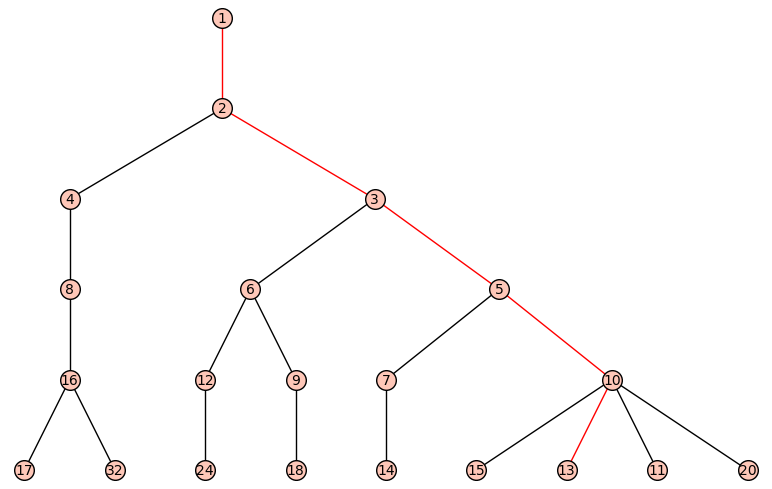

In [112]:
printTree(13)

Построим дерево и выделим путь до вершины $n = 45$:

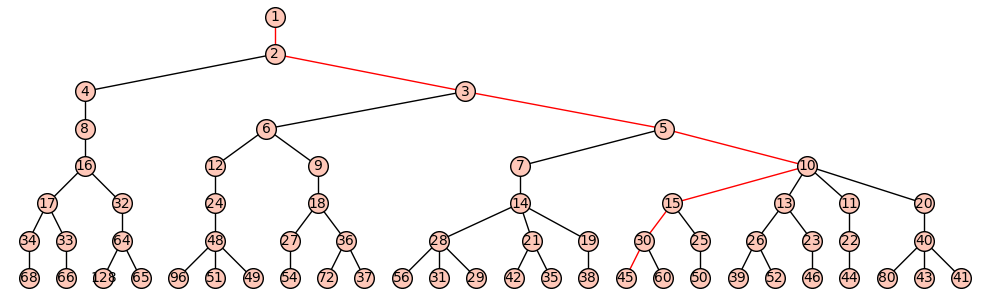

In [113]:
printTree(45)

Получим цепочку вычисления $x^{45}$ с помощью дерева степеней:

In [114]:
buildPath(buildTree(45), 45)

[(1, 2), (2, 3), (3, 5), (5, 10), (10, 15), (15, 30), (30, 45)]

Так, получили цепочку $x, x^3, x^5, x^{10}, x^{15}, x^{30}, x^{45}$.

Сравним данный метод с методом $SX$. Напишем функцию, возвращающую количество операций умножения для бинарного метода $SX$:

In [115]:
def SXTreeComparison():
    tree = buildTree(2000)
    
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) < len(tree.shortest_path(1, i)) - 1:
            print("Утверждение не является корректным")
            return
    print("Утверждение корректно")
    
SXTreeComparison()

Утверждение корректно


#### Вывод
Таким образом, дерево степеней является эффективным способом нахождения степени числа, оно примерно совпадает по количеству операций с методом $SX$, а иногда и превосходит ($n$ = 55, $n$ = 23), а значит, дерево эффективнее метода возведения справа налево.

## Выводы
Были реализованы и сравнены методы возведения числа в заданную степень ($SX$, метод возведения в степень справа налево, дерево степеней, метод множителей). Наиболее эффективным оказался метод дерева степеней, наименее эфективным – метод возведения в степень справа налево.